In [1]:
import numpy as np

import matplotlib.pylab as plt

In [2]:
def numerical_diff(f, x):
    
    h = 1e-4
    
    return (f(x+h) - f(x-h)) / (2*h)

In [3]:
def numerical_gradient_no_batch(f, x):
    
    h = 1e-4 
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h

        fxh1 = f(x)

        x[idx] = tmp_val - h 

        fxh2 = f(x) 

        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val
        
    return grad

In [4]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        
        return numerical_gradient_no_batch(f, X)

    else:
        
        grad = np.zeros_like(X)

 

    for idx, x in enumerate(X):
        
        grad[idx] = numerical_gradient_no_batch(f, x)

    return grad

In [5]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    
    x = init_x
    x_history = []

    for i in range(step_num):

        x_history.append( x.copy() )
        
        grad = numerical_gradient(f, x)

        x -= lr * grad

    return x, np.array(x_history)

In [6]:
def function_2(x):
    
    return x[0]**2 + x[1]**2

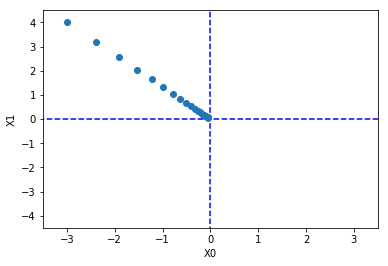

In [7]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1

step_num = 20

x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')

plt.plot( [0,0], [-5, 5], '--b')

plt.plot(x_history[:,0], x_history[:,1], 'o')

 

plt.xlim(-3.5, 3.5)

plt.ylim(-4.5, 4.5)

plt.xlabel("X0")

plt.ylabel("X1")

plt.show()